<h1>Лабораторна робота №1 з ML</h1>

Тема: побудова реляційної моделі 
Мета роботи: навчитися<br>
a) ідентифікувати змінні моделі;<br>
b) здійснити специфікацію моделі;<br>
c) оцінити параметри моделі методом найменших квадратів;<br>
d) обчислити коефіцієнт кореляції rxy, оцінити щільність зв’язку між показником і
фактором;<br>
e) обчислити коефіцієнт детермінації r2<br>
f) дослідити статистичну значущість коефіцієнта детермінації;<br>
g) перевірити за допомогою f-критерію рівень значущості зв'язку між залежною і
незалежною змінними;<br>
h) перевірити значущість оцінок параметрів за допомогою t-критерію;<br>
i) визначити довірчі інтервали для коефіцієнтів рівняння регресії;<br>
j) виконати точковий та інтервальний прогнози<br>

Для початку імпортуємо потрібні бібліотеки(pandas, numpy, scipy, matplotlib) за допомогою синонімів.

Відкриваємо наш датасет під назвою Sleep_Efficiency.csv, вибираємо потрібні нам колонки Age та Sleep duration, виводимо графік на екран.


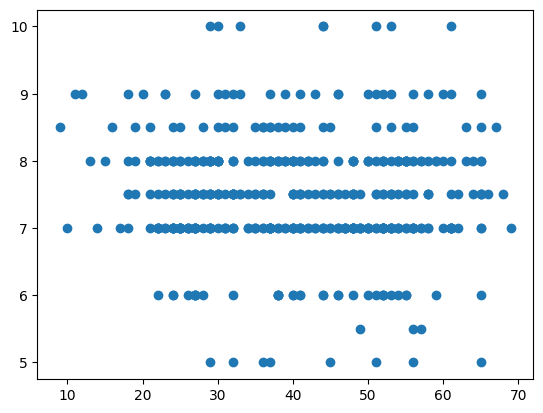

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import scipy.stats
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind

df = pd.read_csv("../datasets/Sleep_Efficiency.csv") 
int, float 
age, sleep = df["Age"], df["Sleep duration"]
age, sleep = age.to_numpy(), sleep.to_numpy()
plt.plot(age, sleep, "o")
plt.show()

Згідно теми лабораторної роботи, ми припускаємо, що наш <font size="4" style="color:DodgerBlue">y</font> (як стовпчик даних кількості годин сну) залежить від <font size="4" style="color:DodgerBlue">x</font> (як стовпчик віку людей) у вигляді лінійної залежності. 
<br>
<font size="5" style="color:Orange">y=h(x) = ax + b</font>
<br>
Згідно графіка намальованого вище ми аналітично прийшли до висновку, що залежність між y та x описується у вигляді горизонтальної лінії
<font size="4" style="color:DodgerBlue">(y=0x+b)</font>, <br>отже ми бачимо, що наші початкові параметри - <font size="4" style="color:DodgerBlue">(a,b) = (0, 7.5)</font><br>
Загалом для збільшення точності параметрів використовується один з трьох методів градієтного спуску(власне сам градієнтний спуск, стохастичний градієнтний спуск та mini batch градієнтний спуск)
<br>Так як наш датасет містить невелику кількість записів, то ми можемо використатти власне градієнтний спуск для наглядності результатів, 
<br>і тепер за його допомогою збільшуємо точність наших параметрів використовучюи наступні формули:<p><img src="../images/lab1/Screenshot_1.png"/></p><p><img src="../images/lab1/Screenshot_2.png"/></p>
Параметри альфа з попередньої формули береться довільний для точності обчислення, дивлячись на об'єм вхідних даних; Так як наш датасет містить приблизно <font size="4" style="color:DodgerBlue">500</font> записів, то ми можем взяти достатньо точне значення альфа - <font size="4" style="color:DodgerBlue">0.001</font>

In [2]:
a = 0
b = 7.5
m = len(age)
global alpha
alpha = 0.001

SyntaxError: invalid syntax (2726021382.py, line 8)

З розміру датасету визначаємо, що кількість ітерацій для циклу градієнтного спуску може бути велика, тому ми беремо 1000, реалізуємо цей спуск за допомогою формул <p><img src="../images/lab1/Screenshot_3.png"/></p><p><img src="../images/lab1/Screenshot_4.png"/></p> Для обчислення а і b відповідно. 

In [3]:
for i in range(1000):
    s1, s2 = 0, 0
    for j in range(m):
        s1 += (a*age[j] + b - sleep[j])*age[j]
        s2 += a*age[j] + b - sleep[j]
    s1, s2 = s1/m ,s2/m
    a = a - alpha * s1
    b = b - alpha * s2 
print("a = ", a, "b = ", b)

a =  -0.0014350543561185932 b =  7.512032868716939


Отже ми отримали більш точні значення для a і b.

А також, ми бачимо що з кожним наступним роком людини, вона спить менше на <font style="color:DodgerBlue">0.0014 годин</font>

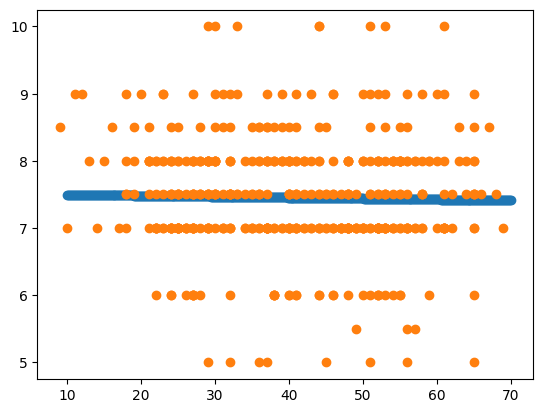

In [4]:
x = np.linspace(10, 70, m)
y = a*x + b
plt.plot(x, y, "o")
plt.plot(age, sleep, "o")
plt.show()


Вивели на екран нову функцію лінійої регресії та порівняли її з початковим графіком.
<br><font size="5" style="color:rgb(237, 107, 96)">Отже, з віком, час який проводить людина у сні несуттєво зменшується від бази яка становить 7.5 годин.</font> 

In [5]:
corr_matrix = np.corrcoef(age, y)
corr = corr_matrix[0,1]
print("Correlation coefficient: ", corr)
rsq = corr**2
print("Determination coefficient: ",rsq)

m = len(age)
n = 1 
fr = abs((rsq/(1-rsq))*((n-m-1)/m))
print("F criterion: ", fr)
print("F table", 3.84)

Correlation coefficient:  -0.02130980110226426
Determination coefficient:  0.00045410762301806306
F criterion:  0.0004543139304371179
F table 3.84


Обчислили коефіціент кореляції, який рівний <font  style="color:DodgerBlue">0.021</font> це підтверджує наші попередні висновки, що тривалість сну слабо залежить від значення віку людини. А знак мінус говорить про те, що чим більше вік, тим менше спить людина.
<br>Обчислили коефіціент детермінації, який рівний <font style="color:DodgerBlue">0.00045</font> це підтверджує наші попередні висновки, що варіація довжину сна залежить від віку.
<br>Для рівня значущості <font style="color:Orange">alpha = 0,05</font> і ступенів вільності <font style="color:Orange">k1 = m =</font> <font size="4" style="color:DodgerBlue">1</font>, <font style="color:Orange">k2 = m – n – 1 =</font> <font  style="color:DodgerBlue">998</font> знаходимо в таблиці F-критерію табличне значення <font style="color:Orange">Fa,k1,k2 = </font><font  style="color:DodgerBlue">3.84</font>. Оскільки <font style="color:Orange">F = </font> <font  style="color:DodgerBlue">0.0004</font> не перевищує табличне, то гіпотеза про істотність зв’язку між залежною і незалежними змінними регресійної моделі не підтверджується.

In [6]:
sigmau2, sigmay2  = 0, 0
for i in range(m):
    sigmau2 += (sleep[i] - y[i])**2
    sigmay2 += (sleep[i] - np.average(y))**2
sigmau2, sigmay2  = sigmau2/(m-n-1), sigmay2/(m-1)
print("Value of fact and counted sigmas': ", sigmau2, sigmay2)


Value of fact and counted sigmas':  0.7540751844324307 0.7511617217832401


Обчислили середні квадратичні відхилення(σ) по фактичним та розрахунковим значенням. Їхні значення є наближені одне до одного, отже наші обчислення були вірними. 

Вводимо одиничну матрицю розміру m. Обчислюєм по формумлі потрібну нам квадратну матрицю: <p><img src="../images/lab1/Screenshot_5.png"/></p>

In [7]:
one =  np.ones(m)
#print(one)
X = []
for i in range(m):
    X.append([one[i], age[i]])
X = np.array(X)
X =  np.matmul(X.transpose(), X)
X = inv(X) 
print(X)

[[ 2.29519168e-02 -5.14815004e-04]
 [-5.14815004e-04  1.27791961e-05]]


Отримали проміжні результати.

Зараз робимо перевірку за гіпотезою за допомогою таблиці Стьюдента. Значення t фактичного є меншим за t табличне, отже параметр а1(значення біля х) не є статистично значимим при обчислені у.

Отже, будуємо довірчий інтервал для а1. Визначаємо ліві і праві межі.

In [8]:
sigmaa = (sigmau2 * X[1][1])**0.5
t1 = abs(a)/sigmaa
print("Value of t-criteria: ", t1)
ttable = 1.96
leftBorder = a - ttable*sigmaa
rightBorder = a + ttable*sigmaa
print("Value of borders: ", leftBorder, rightBorder)

Value of t-criteria:  0.46228442267256364
Value of borders:  -0.007519418007680965 0.00464930929544378


Беремо значення x0, яке лежить за межами значень графіку нашого датасету(<font size = "4" style ="color:DodgerBlue">100</font>), обчислюємо очікуванне значення фукнції лінійної регресії за данним аргументом, орієнтовно отримуємо <font size = "4" style ="color:DodgerBlue">7.3685</font>.

In [9]:
x0 = 100 
y0 = a*x0 + b
print("Value of function at 'out-of-range' point: ", y0)
X0t = [1, x0]
X0t = np.array(X0t)
X0 = [[1], [x0]]
X0 = np.array(X0)
My0 = np.matmul(X0t, X)
My0 = np.matmul(My0, X0)
My0 = My0[0]
print("Math expectetion: ", My0)

Value of function at 'out-of-range' point:  7.368527433105079
Math expectetion:  0.047780877046972085


Тепер для данної точки на графіку необхідно обчислити прогнозоване математичне очікування, а також очікуванний інтервал. Виконуємо за відповідними формулами: <p><img src="../images/lab1/Screenshot_6.png"/></p>
<p><img src="../images/lab1/Screenshot_7.png"/></p>


In [10]:
sigman2 = sigmau2 * My0
leftBorder1 = y0 - ttable * (sigman2**0.5) 
rightBorder1 = y0 + ttable * (sigman2**0.5) 
print("Borders for math expectetion: ", leftBorder1, rightBorder1)

Borders for math expectetion:  6.996486731707257 7.740568134502901


Нарешті ми обчислюємо інтервали точності для значення нашої ф-ції лінійної регресії в "недосяжній" точці <font size="4" style="color:Orange">(100, 7.3685)</font>

In [11]:
leftBorder2 = y0 - ttable * (sigmau2**0.5) * ((1 + My0)**0.5)
rightBorder2 = y0 + ttable * (sigmau2**0.5) * ((1 + My0)**0.5)
print("Left and right border of final value of function: ", leftBorder2, rightBorder2)

Left and right border of final value of function:  5.626324944296098 9.11072992191406


Отже, згідно нашого датасету для людей віком 100 років тривалість сну буде лежати в межах <font size="5" style="color:rgb(237, 106, 94)">(5.626324944296098, 9.11072992191406)</font>

<font size = "4.4"> Згідно з F- критерієм з надійністю <font style="color: rgb(97, 197, 84)">Р=0,999</font> регресійну модель <font style="color: rgb(97, 197, 84)">Y = 7.5120 - 0.0014X</font> можна вважати адекватною експериментальним даним і на підставі прийнятої моделі можна проводити аналіз і знаходити значення прогнозу</font> 